# Homework 9

## Question 1

In [29]:
var('l')

def is_eigenvector(A, v, eigenvalue):
    return (A * v == eigenvalue * v)

Q1A = matrix([[18,-4],[-4,12]])
Q1B = matrix([[15,-4],[-4,15]])

show(Q1A, '\n\n\n', Q1B)

[18 -4]
[-4 12] '\n\n\n' [15 -4]
[-4 15]

In [30]:
show(Q1A.eigenvalues())
show(Q1A.trace())
show(Q1A.det())

show(is_eigenvector(Q1A, vector([-2, 1]), Q1A.eigenvalues()[0]))
show(is_eigenvector(Q1A, vector([1/2, 1]), Q1A.eigenvalues()[1]))

[20, 10]

30

200

True

True

In [31]:
show(Q1B.eigenvalues())
show(Q1B.trace())
show(Q1B.det())

[19, 11]

30

209

## Question 2

In [32]:
Q2A = matrix([[8,0,-5],[9,-1,-5],[14,-4,-7]])
Q2B = matrix([[2,-4,1],[-1,-1,1],[4,-4,-1]])

show(Q2A, '\n\n\n', Q2B)

[ 8  0 -5]
[ 9 -1 -5]
[14 -4 -7] '\n\n\n' [ 2 -4  1]
[-1 -1  1]
[ 4 -4 -1]

In [33]:
show(Q2A.eigenvalues())
show('trace:', Q2A.trace())
show('determinant:', Q2A.det())

show(is_eigenvector(Q2A, vector([5/9,4/9,1]), Q2A.eigenvalues()[1]))
show(is_eigenvector(Q2A, vector([1,1,1]), Q2A.eigenvalues()[0]))
show(is_eigenvector(Q2A, vector([1/2,1/2,1]), Q2A.eigenvalues()[2]))

[3, -1, -2]

'trace:' 0

'determinant:' 6

True

True

True

In [34]:
show(Q2B.eigenvalues())
show(Q2B.trace())
show(Q2B.det())

[3, -1, -2]

0

6

## Question 3

part a: shifted points
[[-2.90909091 -1.72727273]
 [-0.90909091 -1.72727273]
 [-1.90909091 -0.72727273]
 [ 0.09090909 -0.72727273]
 [ 1.09090909 -0.72727273]
 [-0.90909091  0.27272727]
 [ 0.09090909  0.27272727]
 [ 2.09090909  0.27272727]
 [ 0.09090909  1.27272727]
 [ 1.09090909  1.27272727]
 [ 2.09090909  2.27272727]]

part b: covariance matrix
[[24.90909091 13.72727273]
 [13.72727273 16.18181818]]

part c: first principal component
[0.80713789 0.59036296]


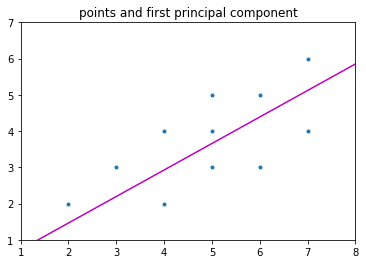

In [35]:
import numpy as np
import matplotlib.pyplot as plt


def findPCA(points) :
    """  student fills this in
    """
    
    mean = np.mean(points, axis=0)
    
    shiftedPoints = points - mean
    
    covMatrix = shiftedPoints.transpose().dot(shiftedPoints)
    
    eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
    
    indices = abs(eigenvalues).argsort()[::-1]
    
    eigenvalues = abs(eigenvalues)[indices]
    eigenvectors = abs(eigenvectors)[:, indices]
    
    fpc = eigenvectors[0]
    
    return [shiftedPoints, covMatrix, fpc]

def plotPCA(points, fpc) :
    x = points[:, 0];   # make plotting easier to write
    y = points[:, 1];

    plt.plot(x, y, '.')
    mult = 10
    fpcX = fpc[0]
    fpcY = fpc[1]

    plt.plot([-mult*fpcX, mult*fpcX], [-mult*fpcY, mult*fpcY], 'm-')

    xmin = min(x) - 1
    xmax = max(x) + 1
    ymin = min(y) - 1
    ymax = max(y) + 1
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title("points and first principal component")

    # from https://stackoverflow.com/questions/16183462/saving-images-in-python-at-a-very-high-quality
    #plt.savefig('pca.eps', format='eps', dpi=1000)

    plt.show()     # this causes the plot to display


######   main   ######
points = np.array([[2, 4, 3, 5, 6, 4, 5, 7, 5, 6, 7],
                   [2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6]]).T # the .T makes nx2

shiftedPoints, covMatrix, fpc = findPCA(points)
#        points : nx2 matrix (i.e., 2D Numpy array)
# shiftedPoints : nx2 matrix (i.e., 2D Numpy array)
#     covMatrix : 2x2 matrix (i.e., 2D Numpy array)
#           fpc : vector (i.e., 1D Numpy array)

print("part a: shifted points")
print(shiftedPoints)

print("\npart b: covariance matrix")
print(covMatrix)

print("\npart c: first principal component")
print(fpc)

plotPCA(points, fpc)